<a href="https://colab.research.google.com/github/aanhisbullah/Covid-19-Analysis-Visualization-Indonesia/blob/main/Covid_19_Indonesian_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [3]:
# import excel lalu read dulu
df = pd.read_csv('/content/drive/MyDrive/Dataset Data Analyst/covid_19_indonesia_time_series_all.csv')

In [4]:
df.head()

,Date,Location ISO Code,Location,New Cases,New Deaths,New Recovered,New Active Cases,Total Cases,Total Deaths,Total Recovered,...,Latitude,New Cases per Million,Total Cases per Million,New Deaths per Million,Total Deaths per Million,Total Deaths per 100rb,Case Fatality Rate,Case Recovered Rate,Growth Factor of New Cases,Growth Factor of New Deaths
0,3/1/2020,ID-JK,DKI Jakarta,2,0,0,2,39,20,75,...,-6.204699,0.18,3.60,0.0,1.84,0.18,51.28%,192.31%,NaN,NaN
1,3/2/2020,ID-JK,DKI Jakarta,2,0,0,2,41,20,75,...,-6.204699,0.18,3.78,0.0,1.84,0.18,48.78%,182.93%,1.0,1.0
2,3/2/2020,IDN,Indonesia,2,0,0,2,2,0,0,...,-0.789275,0.01,0.01,0.0,0.00,0.00,0.00%,0.00%,NaN,NaN
3,3/2/2020,ID-RI,Riau,1,0,0,1,1,0,1,...,0.511648,0.16,0.16,0.0,0.00,0.00,0.00%,100.00%,NaN,NaN
4,3/3/2020,ID-JK,DKI Jakarta,2,0,0,2,43,20,75,...,-6.204699,0.18,3.96,0.0,1.84,0.18,46.51%,174.42%,1.0,1.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31822 entries, 0 to 31821
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         31822 non-null  object 
 1   Location ISO Code            31822 non-null  object 
 2   Location                     31822 non-null  object 
 3   New Cases                    31822 non-null  int64  
 4   New Deaths                   31822 non-null  int64  
 5   New Recovered                31822 non-null  int64  
 6   New Active Cases             31822 non-null  int64  
 7   Total Cases                  31822 non-null  int64  
 8   Total Deaths                 31822 non-null  int64  
 9   Total Recovered              31822 non-null  int64  
 10  Total Active Cases           31822 non-null  int64  
 11  Location Level               31822 non-null  object 
 12  City or Regency              0 non-null      float64
 13  Province        

In [6]:
df.isna().sum()

Date                               0
Location ISO Code                  0
Location                           0
New Cases                          0
New Deaths                         0
New Recovered                      0
New Active Cases                   0
Total Cases                        0
Total Deaths                       0
Total Recovered                    0
Total Active Cases                 0
Location Level                     0
City or Regency                31822
Province                         929
Country                            0
Continent                          0
Island                           929
Time Zone                        929
Special Status                 27264
Total Regencies                    0
Total Cities                     901
Total Districts                    0
Total Urban Villages             904
Total Rural Villages             929
Area (km2)                         0
Population                         0
Population Density                 0
L

In [7]:
df['Date']

0         3/1/2020
1         3/2/2020
2         3/2/2020
3         3/2/2020
4         3/3/2020
           ...    
31817    9/15/2022
31818    9/15/2022
31819    9/15/2022
31820    9/15/2022
31821    9/16/2022
Name: Date, Length: 31822, dtype: object

In [8]:
 df['Date'] = pd.to_datetime(df['Date'])

In [9]:
df['Date']

0       2020-03-01
1       2020-03-02
2       2020-03-02
3       2020-03-02
4       2020-03-03
           ...    
31817   2022-09-15
31818   2022-09-15
31819   2022-09-15
31820   2022-09-15
31821   2022-09-16
Name: Date, Length: 31822, dtype: datetime64[ns]

In [10]:
covid = df.groupby(['Date', 'Province'])[['Total Cases', 'Total Deaths', 'Total Recovered', 'Total Active Cases']].sum().reset_index()
covid

,Date,Province,Total Cases,Total Deaths,Total Recovered,Total Active Cases
0,2020-03-01,DKI Jakarta,39,20,75,-56
1,2020-03-02,DKI Jakarta,41,20,75,-54
2,2020-03-02,Riau,1,0,1,0
3,2020-03-03,DKI Jakarta,43,20,75,-52
4,2020-03-03,Jawa Barat,1,1,60,-60
...,...,...,...,...,...,...
30888,2022-09-15,Sulawesi Tenggara,25693,569,25090,34
30889,2022-09-15,Sulawesi Utara,52770,1213,50997,560
30890,2022-09-15,Sumatera Barat,104640,2371,102066,203
30891,2022-09-15,Sumatera Selatan,82198,3376,78510,312


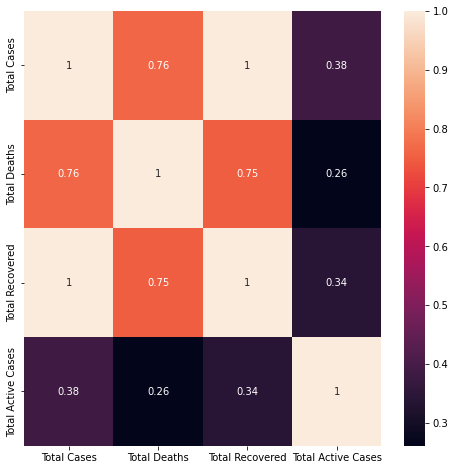

In [40]:
#Melihat korelasi antar variabel dalam suatu heatmap
plt.figure(figsize=(8,8))
sns.heatmap(covid.corr(), annot=True)
plt.show()

In [11]:
covid_update = covid[covid['Date']==max(covid['Date'])]
covid_update.head()

,Date,Province,Total Cases,Total Deaths,Total Recovered,Total Active Cases
30861,2022-09-15,Aceh,44038,2223,41713,102
30862,2022-09-15,Bali,166831,4731,161629,471
30863,2022-09-15,Banten,333875,2950,328482,2443
30864,2022-09-15,Bengkulu,29173,522,28617,34
30865,2022-09-15,DKI Jakarta,1412511,15513,1386134,10864


In [12]:
# Rank active cases by the last date 
#(CARA SHORT VALUES)
# covid_top_cases = covid_update.sort_values('Total Active Cases', ascending=False).reset_index()

top_10_covid = covid_update.nlargest(10, 'Total Active Cases')
top_10_covid


,Date,Province,Total Cases,Total Deaths,Total Recovered,Total Active Cases
30868,2022-09-15,Jawa Barat,1173731,15937,1144358,13436
30865,2022-09-15,DKI Jakarta,1412511,15513,1386134,10864
30863,2022-09-15,Banten,333875,2950,328482,2443
30869,2022-09-15,Jawa Tengah,636409,33489,601517,1403
30870,2022-09-15,Jawa Timur,601545,31764,569003,778
30866,2022-09-15,Daerah Istimewa Yogyakarta,224307,5928,217712,667
30892,2022-09-15,Sumatera Utara,158866,3288,154924,654
30889,2022-09-15,Sulawesi Utara,52770,1213,50997,560
30862,2022-09-15,Bali,166831,4731,161629,471
30891,2022-09-15,Sumatera Selatan,82198,3376,78510,312


Text(0.5, 1.0, 'Update 10 Top Cases Covid-19')

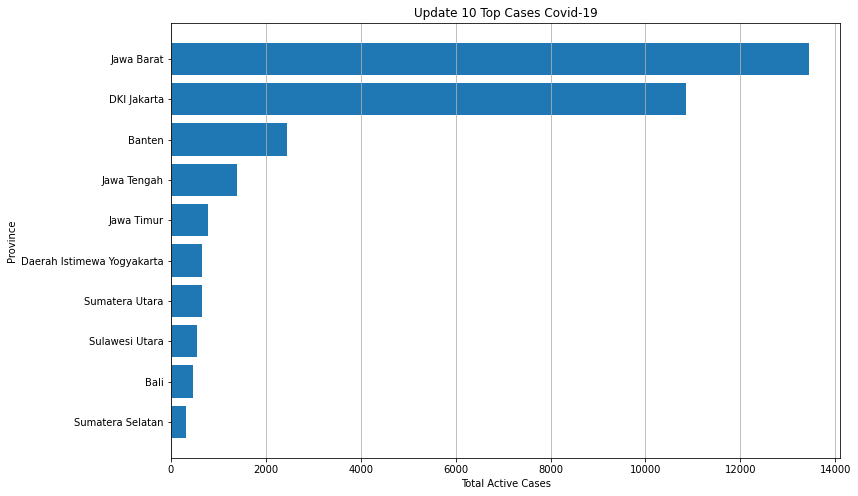

In [13]:
#Visualisasi Update 10 Top Cases Covid 19 by Province
plt.figure(figsize=(12,8))
x = top_10_covid.sort_values('Total Active Cases')['Province'] #bisa dibuat DF nya dulu
y = covid_update.sort_values('Total Active Cases')['Total Active Cases'].tail(10) #atau langsung filter menggunakan Tail
plt.barh(x,y)
plt.grid(axis='x')
plt.ylabel('Province')
plt.xlabel('Total Active Cases')
plt.title('Update 10 Top Cases Covid-19')

In [15]:
#Mencari jumlah Cases Active Nasional dari mulai kasus pertama (03-2020) hingga terbaru (09-2022)
covid_active_df = covid.set_index('Date')['Total Active Cases'].resample('M').sum()
covid_active_df

Date
2020-03-31       -9958
2020-04-30       80446
2020-05-31      329348
2020-06-30      594917
2020-07-31     1051827
2020-08-31     1266726
2020-09-30     1685336
2020-10-31     2066064
2020-11-30     1721990
2020-12-31     2746102
2021-01-31     4097116
2021-02-28     4530031
2021-03-31     4043654
2021-04-30     3223932
2021-05-31     3022355
2021-06-30     4198854
2021-07-31    13815888
2021-08-31    11390900
2021-09-30     2775330
2021-10-31      626815
2021-11-30      265031
2021-12-31      149337
2022-01-31      509547
2022-02-28    10327381
2022-03-31     9285078
2022-04-30     1583971
2022-05-31      148718
2022-06-30      236083
2022-07-31      920521
2022-08-31     1548164
2022-09-30      559714
Freq: M, Name: Total Active Cases, dtype: int64

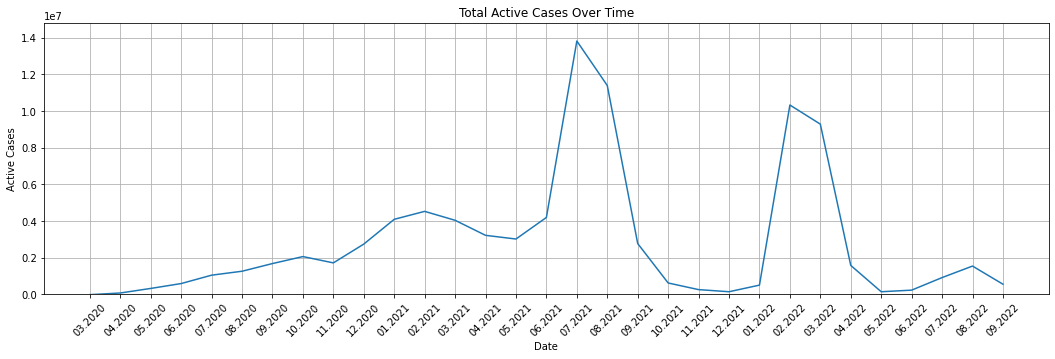

In [16]:
#Trend All Total Cases Over Times
ax = pd.DataFrame(covid_active_df.values).plot(
    grid=True,
    figsize=(18,5),
    legend=False
)

ax.set_xlabel('Date')
ax.set_ylabel('Active Cases')
ax.set_title('Total Active Cases Over Time')

ax.set_ylim([0, max(covid_active_df.values)+1000000])

plt.xticks(
    range(len(covid_active_df.index)), 
    [x.strftime('%m.%Y') for x in covid_active_df.index], 
    rotation=45
)

plt.show()

In [79]:
covid_filter = covid.loc[covid['Date'] >= '2022-01-01']
covid_filter

,Date,Province,Total Cases,Total Deaths,Total Recovered,Total Active Cases
22123,2022-01-01,Aceh,38430,2066,36362,2
22124,2022-01-01,Bali,114392,4061,110273,58
22125,2022-01-01,Banten,132834,2694,130133,7
22126,2022-01-01,Bengkulu,23105,473,22631,1
22127,2022-01-01,DKI Jakarta,865415,13609,851282,524
...,...,...,...,...,...,...
30888,2022-09-15,Sulawesi Tenggara,25693,569,25090,34
30889,2022-09-15,Sulawesi Utara,52770,1213,50997,560
30890,2022-09-15,Sumatera Barat,104640,2371,102066,203
30891,2022-09-15,Sumatera Selatan,82198,3376,78510,312


In [80]:
covid_province = covid_filter.groupby(['Province', 'Date'])[[ 'Total Active Cases']].sum()
covid_province


Total Active Cases
Province       Date                          
Aceh           2022-01-01                   2
               2022-01-02                   3
               2022-01-03                   3
               2022-01-04                   2
               2022-01-05                   1
...                                       ...
Sumatera Utara 2022-09-11                 664
               2022-09-12                 594
               2022-09-13                 588
               2022-09-14                 609
               2022-09-15                 654

[8770 rows x 1 columns]

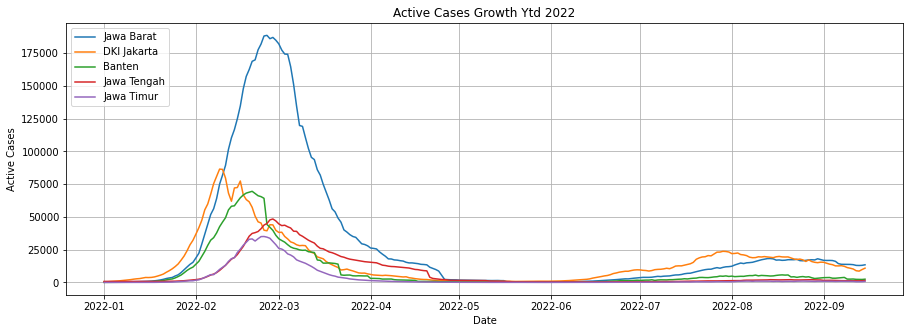

In [81]:
#Visualization Trend Active Case by 5 Top Province Ytd 2022
plt.figure(figsize=(15,5))
plt.plot(covid_province.loc['Jawa Barat'], label='Jawa Barat')
plt.plot(covid_province.loc['DKI Jakarta'], label='DKI Jakarta')
plt.plot(covid_province.loc['Banten'], label='Banten')
plt.plot(covid_province.loc['Jawa Tengah'], label='Jawa Tengah')
plt.plot(covid_province.loc['Jawa Timur'], label='Jawa Timur')
plt.grid()
plt.ylabel('Active Cases')
plt.xlabel('Date')
plt.title('Active Cases Growth Ytd 2022')
plt.legend(loc='upper left')

In [82]:
#Highlight Cases in Jawa Barat
covid_jabar = covid_filter.groupby(['Province', 'Date'])[['Total Deaths',	'Total Recovered', 'Total Active Cases']].sum()
jabar_update = covid_jabar.loc['Jawa Barat', '2022-09-15']
jabar_update

Total Deaths            15937
Total Recovered       1144358
Total Active Cases      13436
Name: (Jawa Barat, 2022-09-15 00:00:00), dtype: int64

([<matplotlib.patches.Wedge at 0x7f25ea305190>,
 [Text(1.1289720823408267, 0.0481875221921401, 'Total Deaths'),
  Text(-1.099975353348276, -0.007363560710419307, 'Total Recovered'),
  Text(1.0992887604354264, -0.03955023616040755, 'Total Active Cases')],
 [Text(0.6294269131634697, 0.026865609717741823, '1.4%'),
  Text(-0.5999865563717868, -0.004016487660228712, '97.5%'),
  Text(0.5996120511465961, -0.021572856087495023, '1.1%')])

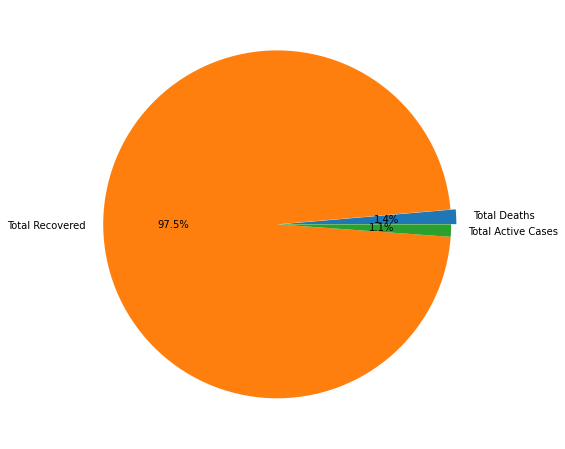

In [83]:
plt.figure(figsize = (8,8))
plt.pie(jabar_update, labels=['Total Deaths','Total Recovered','Total Active Cases'], explode=[0.03,0,0], autopct='%1.1f%%')


In [140]:

covid_jabar = covid_filter.groupby(['Province', 'Date'])[['Total Deaths',	'Total Recovered', 'Total Active Cases']].sum()
jabar_update = covid_jabar.loc['Jawa Barat'].reset_index()
covid_filter_Q1 = jabar_update.loc[(jabar_update['Date'] >= '2022-01-01') & (jabar_update['Date'] < '2022-04-01')]
covid_filter_Q1

,Date,Total Deaths,Total Recovered,Total Active Cases
0,2022-01-01,14756,693639,473
1,2022-01-02,14756,693674,449
2,2022-01-03,14756,693690,444
3,2022-01-04,14756,693713,453
4,2022-01-05,14756,693741,449
...,...,...,...,...
85,2022-03-27,15627,1045694,34383
86,2022-03-28,15633,1048827,31885
87,2022-03-29,15644,1052152,29477
88,2022-03-30,15653,1053494,28952


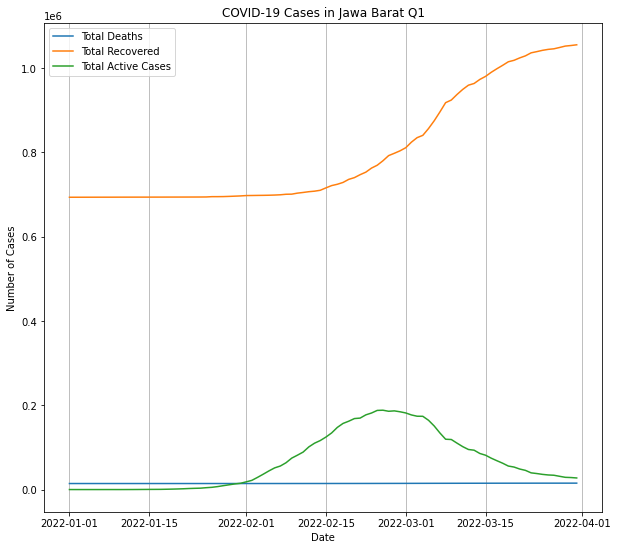

In [142]:
# Create a line plot of the Total Deaths, Total Recovered, and Total Active Cases columns
plt.figure(figsize=(10,9))
plt.plot(covid_filter_Q1['Date'].values, covid_filter_Q1['Total Deaths'], label='Total Deaths')
plt.plot(covid_filter_Q1['Date'].values, covid_filter_Q1['Total Recovered'], label='Total Recovered')
plt.plot(covid_filter_Q1['Date'].values, covid_filter_Q1['Total Active Cases'], label='Total Active Cases')

# Add labels and legend
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.title('COVID-19 Cases in Jawa Barat Q1')
plt.legend()
plt.grid(axis='x')

